In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from scipy.stats import kurtosis, skew
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, classification, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

C:\Users\crist\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### --------------------------------------------------------------------------------------------------------------------------------------------

# VISUALIZACIÓN DE DATASETS

## 1) time_series_covid_19_confirmed

In [8]:
datos_global_confirmed = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',  sep=',')


In [9]:
datos_global_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,607,665,714,784,840,906,933,996,1026,1092
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,446,467,475,494,518,539,548,562,584,609
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,638,646,659,673,673,696,704,713,717,717
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,24,24,24,24


## 2) time_series_covid_19_deaths

In [11]:
datos_global_deaths = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',  sep=',')



In [12]:
datos_global_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18,21,23,25,30,30,30,33,36,36
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,23,24,25,26,26,26,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,293,313,326,336,348,364,367,375,384,392
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,29,29,31,33,33,35,35,36,37,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


## 5) time_series_covid_19_recovered

In [13]:
datos_global_recovered = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv',  sep=',')



In [14]:
datos_global_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32,32,40,43,54,99,112,131,135,150
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,217,232,248,251,277,283,302,314,327,345
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,591,601,691,708,783,846,894,1047,1099,1152
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,128,128,128,169,169,191,205,235,248,282
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,5,5,5,5,6,6,6,6


### --------------------------------------------------------------------------------------------------------------------------------------------

## OBSERVACIÓN DE CURVAS DE CASOS CONFIRMADOS

 Se toman los países: Chile, Estados, España, Italia, China

### 1) Estados Unidos

In [15]:
USA=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='US')].iloc[:,4:]
USA.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
225,1,1,2,2,5,5,5,5,5,7,...,555313,580619,607670,636350,667592,699706,732197,759086,784326,823786


In [16]:
USATotal = USA.sum(axis = 0)
USATotal.head()

1/22/20    1
1/23/20    1
1/24/20    2
1/25/20    2
1/26/20    5
dtype: int64

### 2) Chile

In [17]:
Chile=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Chile')].iloc[:,4:]
ChileTotal = Chile.sum(axis = 0)
Chile.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
48,0,0,0,0,0,0,0,0,0,0,...,7213,7525,7917,8273,8807,9252,9730,10088,10507,10832


### 3) España

In [18]:
Espana=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Spain')].iloc[:,4:]
EspanaTotal = Espana.sum(axis = 0)
Espana.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
201,0,0,0,0,0,0,0,0,0,0,...,166831,170099,172541,177644,184948,190839,191726,198674,200210,204178


### 4) Italia

In [19]:
Italia=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Italy')].iloc[:,4:]
ItaliaTotal = Italia.sum(axis = 0)
Italia.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
137,0,0,0,0,0,0,0,0,0,2,...,156363,159516,162488,165155,168941,172434,175925,178972,181228,183957


### 5) China

In [20]:
China=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='China')].iloc[:,4:]
ChinaTotal = China.sum(axis = 0)
China.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
49,1,9,15,39,60,70,106,152,200,237,...,991,991,991,991,991,991,991,991,991,991
50,14,22,36,41,68,80,91,111,114,139,...,589,589,589,590,593,593,593,593,593,593
51,6,9,27,57,75,110,132,147,182,211,...,579,579,579,579,579,579,579,579,579,579
52,1,5,10,18,35,59,80,84,101,120,...,352,352,353,353,353,354,355,355,355,355
53,0,2,2,4,7,14,19,24,26,29,...,139,139,139,139,139,139,139,139,139,139


### 5) Ecuador

In [21]:
Ecuador=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Ecuador')].iloc[:,4:]
EcuadorTotal = Ecuador.sum(axis = 0)
Ecuador.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
97,0,0,0,0,0,0,0,0,0,0,...,7466,7529,7603,7858,8225,8450,9022,9468,10128,10398


# Revision de anomalias

Se revisa que las curvas sean crecientes.

Para ello se implementó una funcion que busca el indice donde hay un valor menor al del dia anterior. Entrega como resultado un vector o matriz con unos y ceros. Un cero en la posicion (i,j) indica que el dato esta bien, caso contrario se muestra un uno.

In [23]:
#Entrega una matriz donde en la posicion (i,j) del dataframe hay un outlier.
#El criterio de outlier fue que el dia anterior se tengan menos casos.
def revision(df):
    filas=df.shape[0]
    col=df.shape[1]
    M=np.zeros((filas,col))  #Indica si en la posicion (i,j) hay un outlier (1 indica outlier, 0 no)
    for i in list(range(filas)):
        for j in list(range(col)):
            if j==0:  
                if df.iloc[i][j]>df.iloc[i][j+1]: #Si estoy en el primer valor y el que viene es mas chico
                    M[i][j+1]=1;
            elif df.iloc[i][j]<df.iloc[i][j-1]:  #Si estoy en (i,j) y el anterior es mas grande
                M[i][j]=1;                                                                
            #Se pueden agregar mas condiciones aca    
                
    return M   

# Ejemplo: Estados unidos

In [29]:
USA_revision = pd.DataFrame(columns=USA.columns)
USA_revision.loc[0]=USA.sum(axis = 0)

revision(USA_revision)

China_revision = pd.DataFrame(columns=China.columns)
China_revision.loc[0]=China.sum(axis = 0)

revision(China_revision)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
China_revision = pd.DataFrame(columns=China.columns)
China_revision.loc[0]=China.sum(axis = 0)

revision(China_revision)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:
Italia_revision = pd.DataFrame(columns=Italia.columns)
Italia_revision.loc[0]=Italia.sum(axis = 0)

revision(Italia_revision)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
Chile_revision = pd.DataFrame(columns=Chile.columns)
Chile_revision.loc[0]=Chile.sum(axis = 0)

revision(Chile_revision)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [28]:
Espana_revision = pd.DataFrame(columns=Espana.columns)
Espana_revision.loc[0]=Espana.sum(axis = 0)

revision(Espana_revision)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Gráfico de curvas

<IPython.core.display.Javascript object>


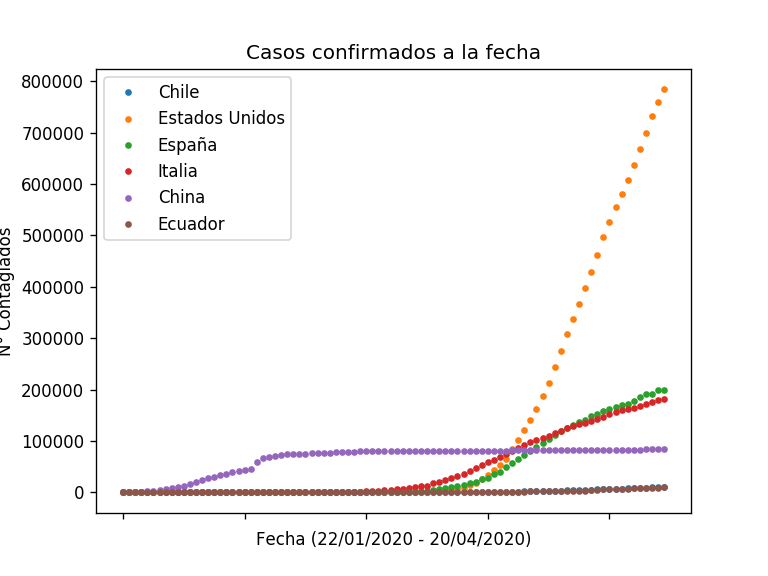

In [56]:
%matplotlib notebook
df = pd.DataFrame({

   'Chile': ChileTotal,

   'Estados Unidos': USATotal,
    
    'España': EspanaTotal,
    
   'Italia': ItaliaTotal,
    
    'China': ChinaTotal,
    
    'Ecuador': EcuadorTotal

   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Contagiados')
plt.title('Casos confirmados a la fecha')
plt.show()

#### Normalización de datos: Por Población

Se buscan manualmente los cantidad de habitantes de cada país

In [62]:
pobUSA = 331800000
pobChile = 19374000
pobEspana = 47183000
pobItalia = 60346000 
pobChina = 1403375000
pobEcuador = 17534000

In [30]:
normUSA = (100*USATotal)/pobUSA
normUSA

1/22/20    3.013864e-07
1/23/20    3.013864e-07
1/24/20    6.027728e-07
1/25/20    6.027728e-07
1/26/20    1.506932e-06
1/27/20    1.506932e-06
1/28/20    1.506932e-06
1/29/20    1.506932e-06
1/30/20    1.506932e-06
1/31/20    2.109705e-06
2/1/20     2.411091e-06
2/2/20     2.411091e-06
2/3/20     3.315250e-06
2/4/20     3.315250e-06
2/5/20     3.315250e-06
2/6/20     3.315250e-06
2/7/20     3.315250e-06
2/8/20     3.315250e-06
2/9/20     3.315250e-06
2/10/20    3.315250e-06
2/11/20    3.616637e-06
2/12/20    3.616637e-06
2/13/20    3.918023e-06
2/14/20    3.918023e-06
2/15/20    3.918023e-06
2/16/20    3.918023e-06
2/17/20    3.918023e-06
2/18/20    3.918023e-06
2/19/20    3.918023e-06
2/20/20    3.918023e-06
               ...     
3/22/20    1.002893e-02
3/23/20    1.321368e-02
3/24/20    1.619530e-02
3/25/20    1.982459e-02
3/26/20    2.526703e-02
3/27/20    3.063803e-02
3/28/20    3.660790e-02
3/29/20    4.246805e-02
3/30/20    4.877366e-02
3/31/20    5.671248e-02
4/1/20     6.430

In [65]:
normChile = (100*ChileTotal)/pobChile
normChina = (100*ChinaTotal)/pobChina
normItalia = (100*ItaliaTotal)/pobItalia
normEspana = (100*EspanaTotal)/pobEspana
normEcuador = (100*EcuadorTotal)/pobEcuador

<IPython.core.display.Javascript object>


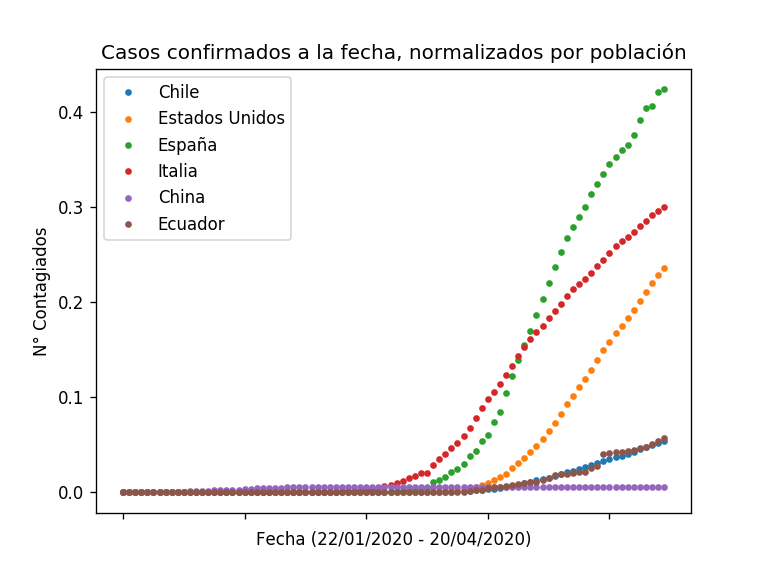

In [66]:
%matplotlib notebook
df = pd.DataFrame({

   'Chile': normChile,

   'Estados Unidos': normUSA,
    
    'España': normEspana,
    
   'Italia': normItalia,
    
    'China': normChina,
    
    'Ecuador': normEcuador

   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Contagiados')
plt.title('Casos confirmados a la fecha, normalizados por población')
plt.show()

#### Normalización de datos: Escala Logarítmica

<IPython.core.display.Javascript object>


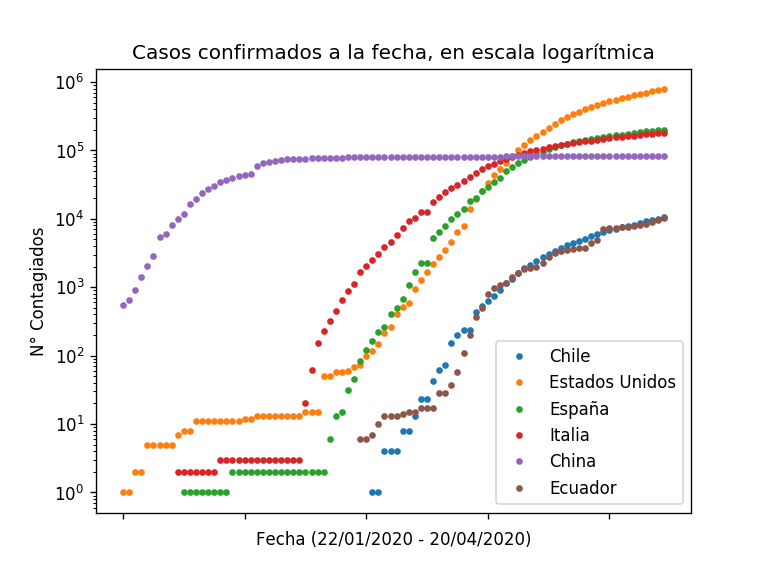

In [67]:
%matplotlib notebook
df = pd.DataFrame({

   'Chile': ChileTotal,

   'Estados Unidos': USATotal,
    
    'España': EspanaTotal,
    
   'Italia': ItaliaTotal,
    
    'China': ChinaTotal,
    
    'Ecuador': EcuadorTotal

   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Contagiados')
plt.title('Casos confirmados a la fecha, en escala logarítmica')
plt.yscale('log')
plt.show()

## Comparación de casos

### 1. Chile

In [42]:
ChileConf=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Chile')].iloc[:,4:]
ChileTotalConf = ChileConf.sum(axis = 0)

ChileDeath=datos_global_deaths[(datos_global_deaths['Country/Region']=='Chile')].iloc[:,4:]
ChileTotalDeath = ChileDeath.sum(axis = 0)

ChileRecov=datos_global_recovered[(datos_global_recovered['Country/Region']=='Chile')].iloc[:,4:]
ChileTotalRecov = ChileRecov.sum(axis = 0)

ChileTotalRecovDeath = ChileTotalDeath + ChileTotalRecov

<IPython.core.display.Javascript object>


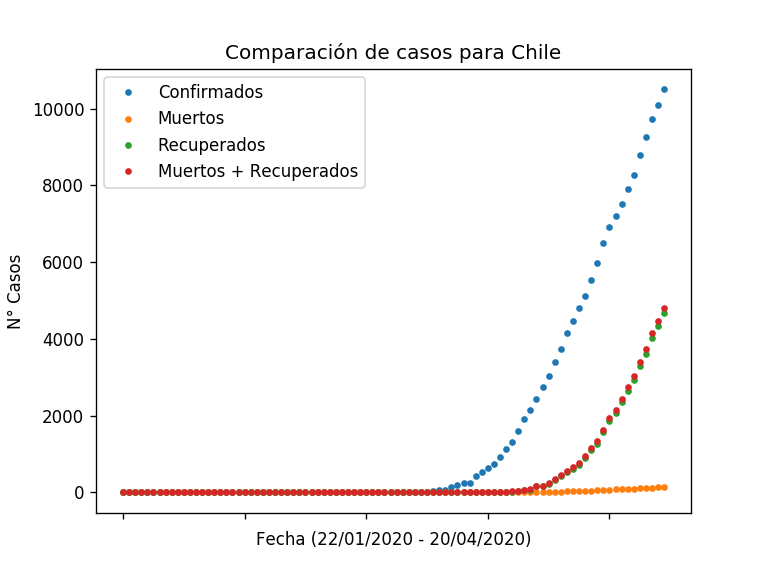

In [43]:
%matplotlib notebook
df = pd.DataFrame({

   'Confirmados': ChileTotalConf,
    'Muertos': ChileTotalDeath,
    'Recuperados': ChileTotalRecov,
    'Muertos + Recuperados': ChileTotalRecovDeath


   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Casos')
plt.title('Comparación de casos para Chile')
plt.show()

### 2. China

In [45]:
ChinaConf=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='China')].iloc[:,4:]
ChinaTotalConf = ChinaConf.sum(axis = 0)

ChinaDeath=datos_global_deaths[(datos_global_deaths['Country/Region']=='China')].iloc[:,4:]
ChinaTotalDeath = ChinaDeath.sum(axis = 0)

ChinaRecov=datos_global_recovered[(datos_global_recovered['Country/Region']=='China')].iloc[:,4:]
ChinaTotalRecov = ChinaRecov.sum(axis = 0)

ChinaTotalRecovDeath = ChinaTotalDeath + ChinaTotalRecov

<IPython.core.display.Javascript object>


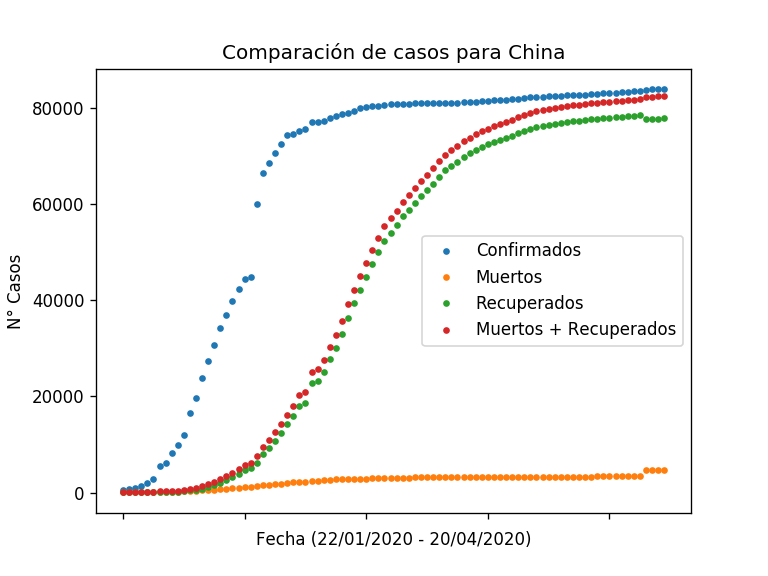

In [46]:
%matplotlib notebook
df = pd.DataFrame({

   'Confirmados': ChinaTotalConf,
    'Muertos': ChinaTotalDeath,
    'Recuperados': ChinaTotalRecov,
    'Muertos + Recuperados': ChinaTotalRecovDeath


   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Casos')
plt.title('Comparación de casos para China')
plt.show()

### 3. Estados Unidos

In [48]:
USAConf=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='US')].iloc[:,4:]
USATotalConf = USAConf.sum(axis = 0)

USADeath=datos_global_deaths[(datos_global_deaths['Country/Region']=='US')].iloc[:,4:]
USATotalDeath = USADeath.sum(axis = 0)

USARecov=datos_global_recovered[(datos_global_recovered['Country/Region']=='US')].iloc[:,4:]
USATotalRecov = USARecov.sum(axis = 0)

USATotalRecovDeath = USATotalDeath + USATotalRecov

<IPython.core.display.Javascript object>


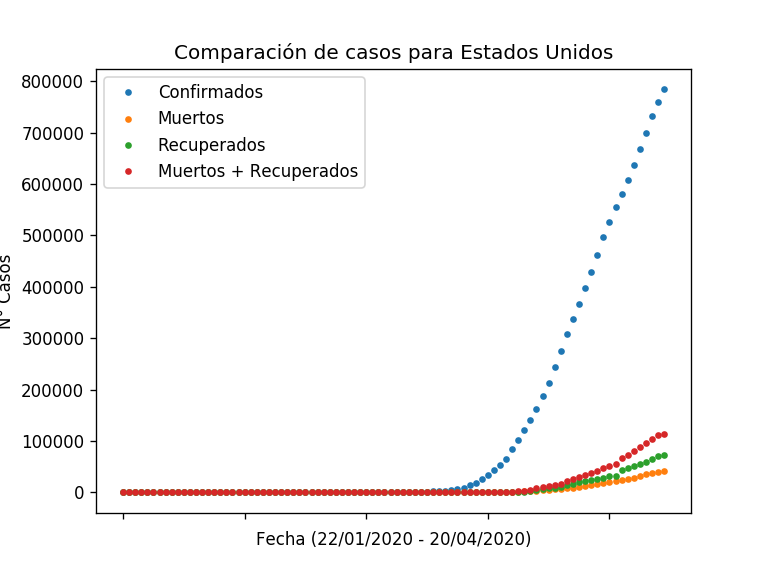

In [49]:
%matplotlib notebook
df = pd.DataFrame({

   'Confirmados': USATotalConf,
    'Muertos': USATotalDeath,
    'Recuperados': USATotalRecov,
    'Muertos + Recuperados': USATotalRecovDeath


   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Casos')
plt.title('Comparación de casos para Estados Unidos')
plt.show()

### 4. España

In [51]:
SpainConf=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Spain')].iloc[:,4:]
SpainTotalConf = SpainConf.sum(axis = 0)

SpainDeath=datos_global_deaths[(datos_global_deaths['Country/Region']=='Spain')].iloc[:,4:]
SpainTotalDeath = SpainDeath.sum(axis = 0)

SpainRecov=datos_global_recovered[(datos_global_recovered['Country/Region']=='Spain')].iloc[:,4:]
SpainTotalRecov = SpainRecov.sum(axis = 0)

SpainTotalRecovDeath = SpainTotalDeath + SpainTotalRecov

<IPython.core.display.Javascript object>


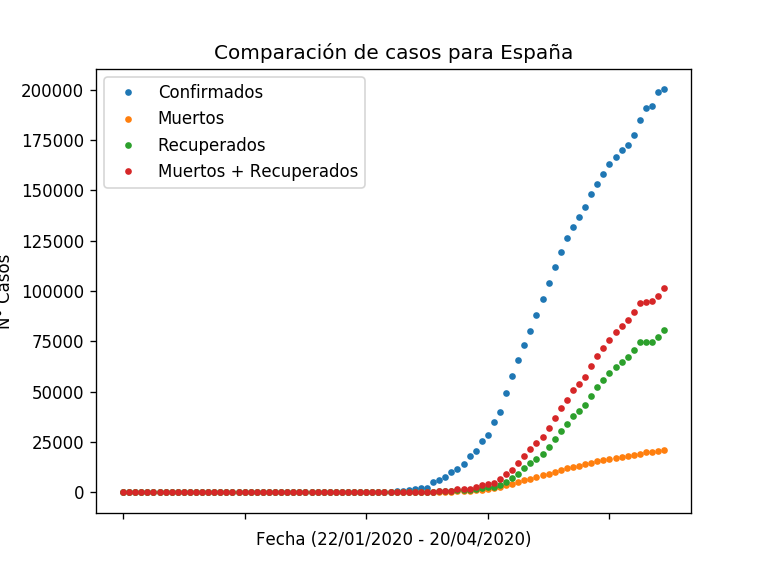

In [52]:
%matplotlib notebook
df = pd.DataFrame({

   'Confirmados': SpainTotalConf,
    'Muertos': SpainTotalDeath,
    'Recuperados': SpainTotalRecov,
    'Muertos + Recuperados': SpainTotalRecovDeath


   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Casos')
plt.title('Comparación de casos para España')
plt.show()

### 5. Italia

In [53]:
ItaliaConf=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Italy')].iloc[:,4:]
ItaliaTotalConf = ItaliaConf.sum(axis = 0)

ItaliaDeath=datos_global_deaths[(datos_global_deaths['Country/Region']=='Italy')].iloc[:,4:]
ItaliaTotalDeath = ItaliaDeath.sum(axis = 0)

ItaliaRecov=datos_global_recovered[(datos_global_recovered['Country/Region']=='Italy')].iloc[:,4:]
ItaliaTotalRecov = ItaliaRecov.sum(axis = 0)

ItaliaTotalRecovDeath = ItaliaTotalDeath + ItaliaTotalRecov

<IPython.core.display.Javascript object>


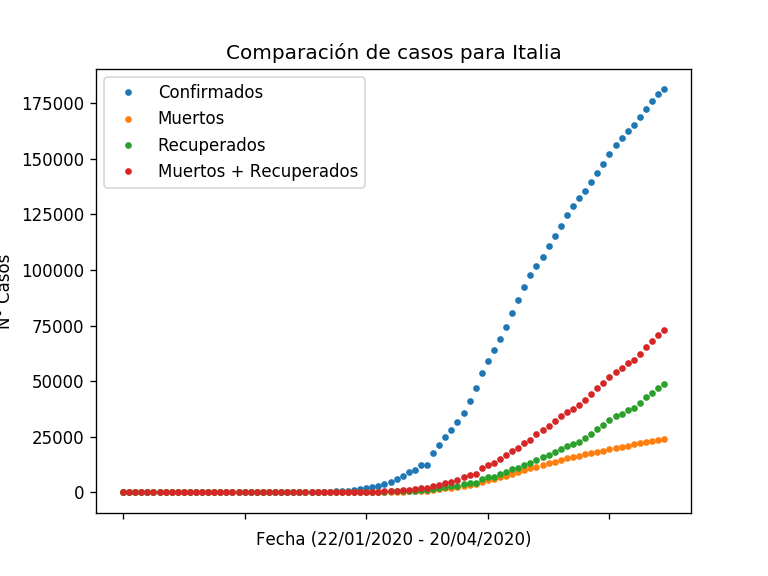

In [54]:
%matplotlib notebook
df = pd.DataFrame({

   'Confirmados': ItaliaTotalConf,
    'Muertos': ItaliaTotalDeath,
    'Recuperados': ItaliaTotalRecov,
    'Muertos + Recuperados': ItaliaTotalRecovDeath


   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Casos')
plt.title('Comparación de casos para Italia')
plt.show()

### 6. Ecuador

In [69]:
EcuadorConf=datos_global_confirmed[(datos_global_confirmed['Country/Region']=='Ecuador')].iloc[:,4:]
EcuadorTotalConf = EcuadorConf.sum(axis = 0)

EcuadorDeath=datos_global_deaths[(datos_global_deaths['Country/Region']=='Ecuador')].iloc[:,4:]
EcuadorTotalDeath = EcuadorDeath.sum(axis = 0)

EcuadorRecov=datos_global_recovered[(datos_global_recovered['Country/Region']=='Ecuador')].iloc[:,4:]
EcuadorTotalRecov = EcuadorRecov.sum(axis = 0)

EcuadorTotalRecovDeath = EcuadorTotalDeath + EcuadorTotalRecov

In [70]:
%matplotlib notebook
df = pd.DataFrame({

   'Confirmados': EcuadorTotalConf,
    'Muertos': EcuadorTotalDeath,
    'Recuperados': EcuadorTotalRecov,
    'Muertos + Recuperados': EcuadorTotalRecovDeath
   }, index=China.keys())

df.plot(style='.')
plt.xlabel('Fecha (22/01/2020 - 20/04/2020)')
plt.ylabel('N° Casos')
plt.title('Comparación de casos para Ecuador')
plt.show()

<IPython.core.display.Javascript object>

### --------------------------------------------------------------------------------------------------------------------------------------------

## OBSERVACIÓN DE DATOS COHERENTES

Revisón de que los datos no 

In [19]:
#Entrega una matriz donde en la posicion (i,j) del dataframe hay un outlier.
#Los parametros a entregar son el dataframe y el umbral (que tan grande puede ser un valor con respecto al valor anterior)


def revision(df,umbral): 
    filas=df.shape[0]
    col=df.shape[1]
    M=np.zeros((filas,col))  #Indica si en la posicion (i,j) hay un outlier (1 indica outlier, 0 no)
    for i in list(range(filas)):
        for j in list(range(col)):
            if j==0:  
                if df.iloc[i][j]>df.iloc[i][j+1]: #Si estoy en el primer valor y el que viene es mas chico
                    M[i][j+1]=1;
            elif df.iloc[i][j]<df.iloc[i][j-1] or df.iloc[i][j]>df.iloc[i][j-1]*umbral:   #Si estoy en (i,j) y el anterior es mas grande
                M[i][j]=1;                                                                # o (i,j) es mas grande que (i,j-1) por un umbral.
                
            #Se pueden agregar mas condiciones aca    
                
    return M            
    
            

In [21]:
df2 = pd.DataFrame(np.array([[1, 2, 3, 6, 0, 10, 100], [4, 5, 6, 0, 0 ,0 ,0 ], [7, 8, 9, 10, 12, 13, 15]]),
                   columns=['a', 'b', 'c', 'd','f','g','h'])
print(df2)

   a  b  c   d   f   g    h
0  1  2  3   6   0  10  100
1  4  5  6   0   0   0    0
2  7  8  9  10  12  13   15


In [ ]:
filas=df2.shape[0]
col=df2.shape[1]
list(range(filas))


In [22]:
revision(ChinaTotal,5)

IndexError: tuple index out of range